#### Amazinum. Task 2. Moisei. Pandas. Visualization

#### Question 1

In [185]:
def answer_one():
    import pandas as pd
    import numpy as np
    
    # Відкриваєм Energy Indicators
    
    energy = pd.read_excel('Energy Indicators.xls')
    energy = (energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1).iloc[16:246,:].replace('...', np.nan).reset_index(drop=True))
   
    #16 - 246 - start and end - point numbers with our values

    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
    energy['Energy Supply'] *= 1000000
    
    energy['Country'].replace('[0-9]+', '', regex=True, inplace=True)
    
    energy['Country'].replace({"Republic of Korea":"South Korea", "United States of America":"United States",
                               "United Kingdom of Great Britain and Northern Ireland":"United Kingdom",
                               "China, Hong Kong Special Administrative Region":"Hong Kong"}, inplace=True)
    
    energy.replace('\([^)]*\)', '', regex=True, inplace=True)

    energy['Country'] = energy['Country'].str.strip()

    # Відкриваєм GDP
    GDP = pd.read_csv('GDP.csv', skiprows=4)
    
    GDP['Country Name'].replace({"Korea, Rep.":"South Korea", "Iran, Islamic Rep.":"Iran", "Hong Kong SAR, China":"Hong Kong"},
                            inplace=True)
    
    GDP = GDP.rename(columns={'Country Name':'Country'})
    
    # Вибираєм 10 років з GDP для подальшого об'єднання в merge
    
    cols = [ 'Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    GDP_to_merge = GDP[cols]
    
    # Відкриваєм ScimEn
    ScimEn = pd.read_excel('ScimEn.xlsx')
    ScimEn = (ScimEn.drop(['Region'], axis=1).reset_index(drop=True))
              
    ScimEn_15 = ScimEn[ScimEn['Rank'] <= 15]
    
    df_merged = pd.merge(pd.merge(ScimEn_15, energy, how='inner', on='Country'), GDP_to_merge, how='inner', on='Country')
    df_merged.set_index('Country', inplace=True)
    
    answer = df_merged
    return answer

answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,303064,301778,3036531,2092737,10.02,273,127191000000,93,19.75491,2.752132e+12,3.550343e+12,4.594307e+12,5.101703e+12,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13
United States,2,184851,181106,2623922,819242,14.19,389,90838000000,286,11.57098,1.381559e+13,1.447423e+13,1.476986e+13,1.447806e+13,1.504896e+13,1.559973e+13,1.625397e+13,1.684319e+13,1.755068e+13,1.820602e+13
India,3,60257,58589,590570,213760,9.80,198,33195000000,26,14.96908,9.402599e+11,1.216735e+12,1.198896e+12,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12
Japan,4,52780,52281,557023,132113,10.55,203,18984000000,149,10.23282,4.601663e+12,4.579751e+12,5.106679e+12,5.289493e+12,5.759072e+12,6.233147e+12,6.272363e+12,5.212328e+12,4.896994e+12,4.444931e+12
United Kingdom,5,47141,45928,748994,132737,15.89,244,7920000000,124,10.60047,2.717060e+12,3.106182e+12,2.938882e+12,2.425798e+12,2.491110e+12,2.674891e+12,2.719158e+12,2.803291e+12,3.087166e+12,2.956574e+12
Germany,6,42343,41464,528645,115432,12.48,211,13261000000,165,17.90153,2.994704e+12,3.425578e+12,3.745264e+12,3.411261e+12,3.399668e+12,3.749315e+12,3.527143e+12,3.733805e+12,3.889093e+12,3.357586e+12
Russian Federation,7,39424,39189,142937,67935,3.63,96,30709000000,214,17.28868,9.899305e+11,1.299706e+12,1.660846e+12,1.222644e+12,1.524917e+12,2.045926e+12,2.208296e+12,2.292473e+12,2.059242e+12,1.363481e+12
Canada,8,35588,34940,665415,113363,18.70,246,10431000000,296,61.94543,1.319265e+12,1.468820e+12,1.552990e+12,1.374625e+12,1.617343e+12,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12
Italy,9,31260,29959,433388,105641,13.86,177,6530000000,109,33.66723,1.949552e+12,2.213102e+12,2.408655e+12,2.199929e+12,2.136100e+12,2.294994e+12,2.086958e+12,2.141924e+12,2.162010e+12,1.836638e+12


#### Tried to visualize first function (answer_one)

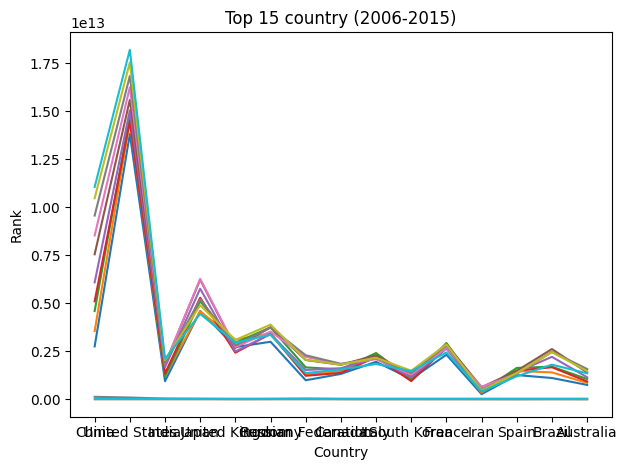

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

data = answer_one()

plt.plot(data.index, data[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']])
plt.title("Top 15 country (2006-2015)")
plt.xlabel('Country')
plt.ylabel('Rank')

plt.tight_layout()
plt.show()

#### Question 2

What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

This function should return a Series named avgGDP with 15 countries and their average GDP sorted in descending order.

In [187]:
def answer_two():
    
    Top15 = answer_one()
    gdp = Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    Top15['avgGDP'] = gdp.mean(axis=1)
    
    #gdp.mean - дає середнє значення gdp
    
    return Top15.sort_values('avgGDP', ascending=False)['avgGDP']

answer_two()

Country
United States         1.570403e+13
China                 6.927702e+12
Japan                 5.239642e+12
Germany               3.523342e+12
United Kingdom        2.792011e+12
France                2.691337e+12
Italy                 2.142986e+12
Brazil                1.988889e+12
Russian Federation    1.666746e+12
Canada                1.616359e+12
India                 1.602352e+12
Spain                 1.400727e+12
South Korea           1.221372e+12
Australia             1.207106e+12
Iran                  4.563261e+11
Name: avgGDP, dtype: float64

#### Tried to visualize second function

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

data = answer_two()
Top15 = answer_one()
gdp = Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
Top15['avgGDP'] = gdp.mean(axis=1)
data.index = ('gdp')

plt.plot(data.index, data[['gdp']])

plt.tight_layout()
plt.show()

TypeError: Index(...) must be called with a collection of some kind, 'gdp' was passed

#### Question 3

By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

This function should return a single number.

In [189]:
def answer_three():
    
    Top15 = answer_one()
    Top15['AvgGDP'] = answer_two()
    Top15.sort_values('AvgGDP', ascending=False, inplace=True)
    final = Top15.iloc[5]['2015']
    initial = Top15.iloc[5]['2006']
    return abs(final - initial)
 
answer_three()

118652421857.7998

#### Tried to visualize third function

NameError: name 'average_y' is not defined

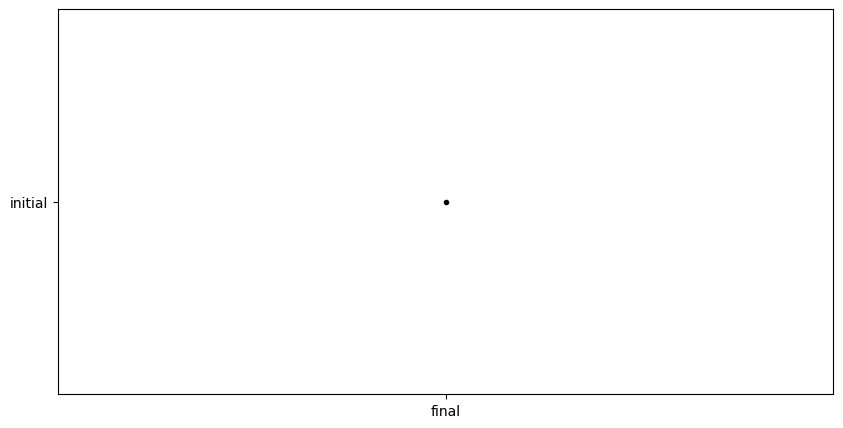

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

data = answer_three()

x = ["final"]
y = ["initial"]

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'k.-')
plt.plot(x, average_y, 'r.-')
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.grid(linestyle=':')

plt.show()

#### Question 4

Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

This function should return a tuple with the name of the country and the ratio.

In [193]:
def answer_four():
    
    Top15 = answer_one()
    df = answer_one()
    df['ratio'] = df['Self-citations'] / df['Citations']
    return (df['ratio'].idxmax(), df['ratio'].max())

    # idxmax() - макс індекс країни, max - дає макс значення тої країни

answer_four()

('China', 0.689186772669207)

#### Question 5

Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?

This function should return a single string value.

In [194]:
def answer_five():
    
    Top15 = answer_one()
    Top15["Population"] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    final = Top15.sort_values("Population", ascending=False)
    return final.iloc[2].name

answer_five()

'United States'

#### Question 6

Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation).

This function should return a single number.

In [195]:
def answer_six():

    import pandas as pd
    import numpy as np
    
    Top15 = answer_one()
    Top15["Population"] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15["Citable docs per Capita"] = Top15["Citable documents"] / Top15["Population"]
    
    Top15['Citable docs per Capita']=np.float64(Top15['Citable docs per Capita'])
    Top15['Energy Supply per Capita']=np.float64(Top15['Energy Supply per Capita'])
    
    return Top15["Citable docs per Capita"].corr(Top15['Energy Supply per Capita'])
    
answer_six()

0.7272331912434825

#### Tried to visualize correlation

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

data = answer_six()

sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.tight_layout()
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'corr'

#### Question 7

Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
This function should return a DataFrame with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std']

In [197]:
def answer_seven():
    import pandas as pd

    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    groups = pd.DataFrame(columns = ['size', 'sum', 'mean', 'std'])
    Top15['Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    for group, frame in Top15.groupby(ContinentDict):
        groups.loc[group] = [len(frame), frame['Population'].sum(), frame['Population'].mean(), frame['Population'].std()]
    return groups

answer_seven()

,size,sum,mean,std
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN
